<a href="https://colab.research.google.com/github/abhikadoo/Naive_bayes_titanic/blob/main/titanic_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**k-nearest algorithm for Titanic dataset**

In [1]:
# importing libraries
import numpy as np
import pandas as pd

In [3]:
# import train adn test data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
#find out features that correlate to passengers survival rate
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Using corr function to find out the liner correlation between survived and other numerical features. 
#We can see there is strong correlation between Survived and the features of Fare and Pclass.

corr_matrix = df_train.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [6]:
#visualizing the correlation of Survived and other non numerical features.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#There are too many missing values in Cabin feature, we can consider to drop this feature later.
#Sex and Embarked seems the features that need to investigate at this point.

df_train['Embarked']=df_train['Embarked'].fillna('S')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

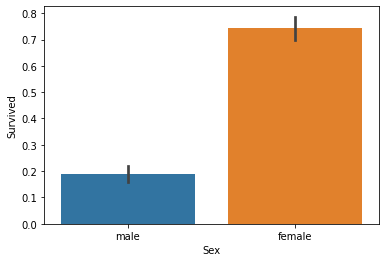

In [11]:
# plotting relationship bet sex and survived
sns.barplot(data=df_train,x='Sex',y='Survived')
plt.show()
# We can observe that female has much higher survival rate than male

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


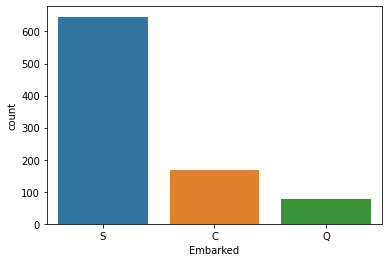

In [12]:
sns.countplot(df_train['Embarked'])

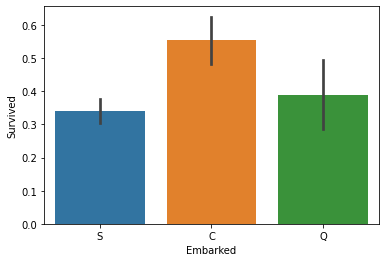

In [13]:
sns.barplot(data=df_train,x='Embarked',y='Survived')
plt.show()
#The majority passengers embarked Titanic at the port of Southampton, 
#but people embarked at Cherbourg has the highest survival compare to others.

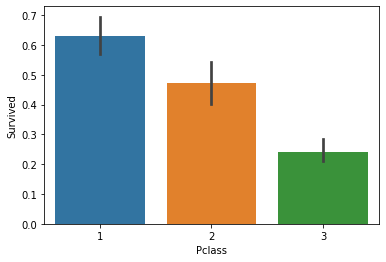

In [14]:
sns.barplot(data=df_train,x='Pclass',y='Survived')
plt.show()
# We can see, passengers from upper class has the highest survival rate which is near 65%. 
# Lower class passengers has the lowest survival rate(around 27%)

Data preparation

In [18]:
q=['PassengerId','Name','Cabin','Ticket','SibSp','Parch','Age']
df_train_set=df_train.drop(q,axis=1)
df_train_set.head()

,Survived,Pclass,Sex,Fare,Embarked
0,0,3,male,7.2500,S
1,1,1,female,71.2833,C
2,1,3,female,7.9250,S
3,1,1,female,53.1000,S
4,0,3,male,8.0500,S


In [20]:
z=['Name','Cabin','Ticket','SibSp','Parch','Age']
df_test_set=df_test.drop(z,axis=1)
df_test_set.head()

,PassengerId,Pclass,Sex,Fare,Embarked
0,892,3,male,7.8292,Q
1,893,3,female,7.0000,S
2,894,2,male,9.6875,Q
3,895,3,male,8.6625,S
4,896,3,female,12.2875,S


In [21]:
mean=df_test_set['Fare'].mean()
df_test_set['Fare']=df_test_set["Fare"].fillna(mean)
df_test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Fare         418 non-null    float64
 4   Embarked     418 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 16.5+ KB


In [23]:
# translating non-numerical features to numerical features
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()

df_train_set.iloc[:,2] = labelencoder.fit_transform(df_train_set.iloc[:,2].values)
df_train_set.iloc[:,4] = labelencoder.fit_transform(df_train_set.iloc[:,4].values)

df_test_set.iloc[:,2] = labelencoder.fit_transform(df_test_set.iloc[:,2].values)
df_test_set.iloc[:,2] = labelencoder.fit_transform(df_test_set.iloc[:,2].values)

In [25]:
df_train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Fare      891 non-null    float64
 4   Embarked  891 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 34.9 KB


Splitting data into train and split

In [27]:
#Split train data into X_train, X_test, y_train, y_test.
X=df_train_set.iloc[:,1:5].values
Y=df_train_set.iloc[:,0].values

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4, random_state=4)

In [29]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(534, 4)
(357, 4)
(534,)
(357,)


**k-nearest neighbors (KNN) model**

In [30]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [32]:
k_range=range(1,26)
scores=[]
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,Y_train)
  Y_pred=knn.predict(X_test)
  scores.append(metrics.accuracy_score(Y_test,Y_pred))
print(scores)

[0.7394957983193278, 0.7366946778711485, 0.7478991596638656, 0.7675070028011205, 0.7282913165266106, 0.7226890756302521, 0.7170868347338936, 0.7282913165266106, 0.7198879551820728, 0.7338935574229691, 0.7338935574229691, 0.7338935574229691, 0.7086834733893558, 0.7058823529411765, 0.711484593837535, 0.711484593837535, 0.7170868347338936, 0.7282913165266106, 0.7366946778711485, 0.7366946778711485, 0.7338935574229691, 0.7310924369747899, 0.7226890756302521, 0.7226890756302521, 0.7058823529411765]


Text(0, 0.5, 'Testing accuracy')

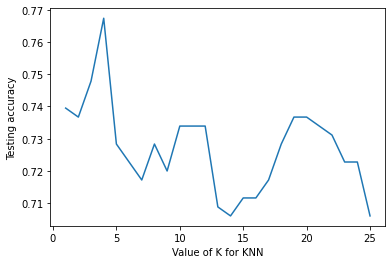

In [33]:
import matplotlib.pyplot as plt
plt.plot(k_range,scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing accuracy')

In [41]:
## K value equal 4 has the highest accuracy rate

from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)
print(metrics.accuracy_score(Y_test,Y_pred))

0.7675070028011205


In [42]:
df_test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Fare         418 non-null    float64
 4   Embarked     418 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 16.5+ KB
